# Part I - Ford GoBike Dataset Exploration

## by (Jumanah Almatrood)

## Introduction

> This dataset contains trip data from the Ford GoBike bike-sharing system.
It includes trip times, start/end stations, trip duration, user type (Customer or Subscriber), gender, and birth year.
The data will be used to explore usage patterns and analyze factors affecting trip duration.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("fordgobike.csv")

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.info()
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id      

In [4]:
# 3. Data cleaning and preparation

# Convert start_time and end_time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create a new column for trip duration in minutes
df['trip_duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Create a new column for trip start hour
df['start_hour'] = df['start_time'].dt.hour

# Convert categorical columns to category type
categorical_cols = ['user_type', 'member_gender']
for col in categorical_cols:
    df[col] = df[col].astype('category')


df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.763833,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.687783,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.915467,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.180533,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.425417,23


### What is the structure of your dataset?

The dataset contains trip-level data with 16 columns and thousands of rows.
Columns include trip duration, start/end time, start/end stations (IDs, names, and coordinates), bike ID, user information (type, birth year, gender), and trip-level details like whether it was a bike-share trip.


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is trip duration (trip_duration_min).
I want to understand how long trips last and what factors influence their length.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


Features that may help explain trip duration include:
start_hour – to see what time of day has longer trips.
user_type – to compare customers vs subscribers.
member_gender – to explore differences in trip duration by gender.
start_station_name / end_station_name – to analyze trip patterns by location.
member_birth_year – to check if age influences trip duration.

## Univariate Exploration

#### What is the distribution of trip durations?

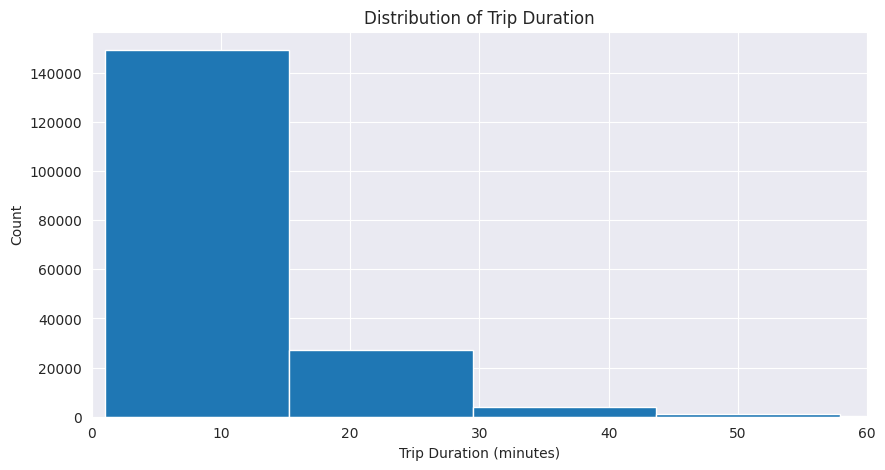

In [5]:
# Distribution of trip duration
plt.figure(figsize=(10,5))
plt.hist(df['trip_duration_min'], bins=100)
plt.xlim(0,60)  # Limit x-axis to avoid long outliers
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

Most trips are short, with the majority lasting less than 20 minutes.
There are a few longer trips, but they are rare.

The distribution is right-skewed, which means we have some long-trip outliers.

#### At what times of day are most trips starting?

/tmp/ipykernel_13/2909399114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='start_hour', data=df, palette='pastel')


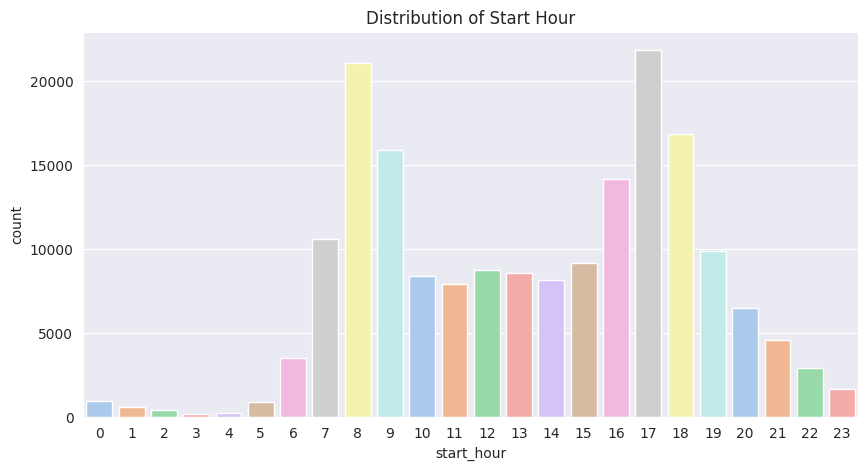

In [6]:
# Distribution of start hour
plt.figure(figsize=(10,5))
sns.countplot(x='start_hour', data=df, palette='pastel')
plt.title('Distribution of Start Hour')
plt.show()

Trips peak around 8 AM and 5 PM, which likely represent commuting hours.
There are very few trips late at night (1–4 AM).

#### What is the distribution of user types?

/tmp/ipykernel_13/1165592709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_type', data=df, palette='muted')


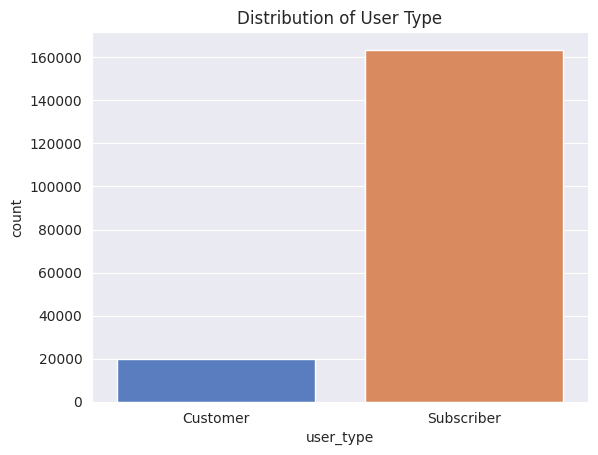

In [9]:
# Distribution of user type
sns.countplot(x='user_type', data=df, palette='muted')
plt.title('Distribution of User Type')
plt.show()


Subscribers make up the majority of trips, much more than customers.
This suggests that most users are regular riders rather than one-time customers.

#### What is the distribution of gender among riders?

/tmp/ipykernel_13/1291959265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='member_gender', data=df, palette='muted')


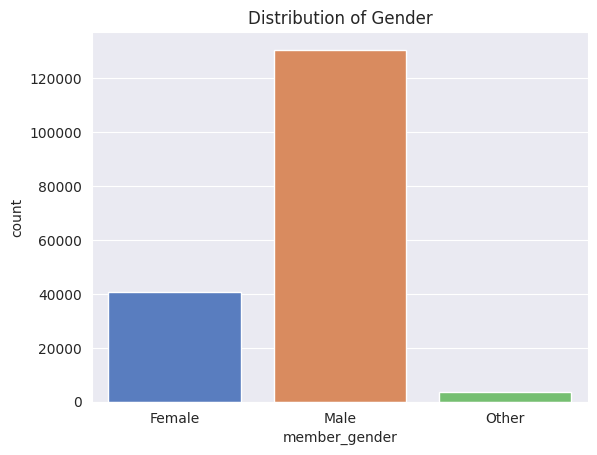

In [10]:
# Distribution of member gender
sns.countplot(x='member_gender', data=df, palette='muted')
plt.title('Distribution of Gender')
plt.show()

Male riders are the largest group, followed by female riders.
The "Other" category is very small compared to Male and Female.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of trip duration is right-skewed, with most trips lasting less than 20 minutes. A few extremely long trips were observed, so I limited the x-axis to 60 minutes to make the histogram more readable. No further transformations were needed for this step.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, trip duration had a few outliers with very long values. I did not remove them but adjusted the visualization by limiting the x-axis to focus on the majority of trips. I also extracted start_hour from start_time to analyze hourly patterns more easily.

## Bivariate Exploration

#### How does trip duration differ between user types?


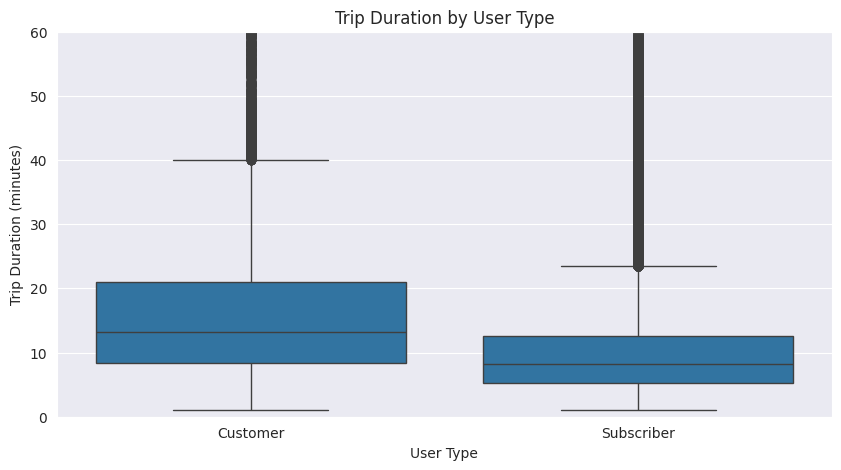

In [11]:
# Trip Duration by User Type (Boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x='user_type', y='trip_duration_min', data=df)
plt.ylim(0,60)  # Focus on majority of trips
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Subscribers have slightly shorter trip durations compared to customers.
Both groups have outliers, but most trips for both groups are below 20 minutes.

#### Do trip durations vary by gender?

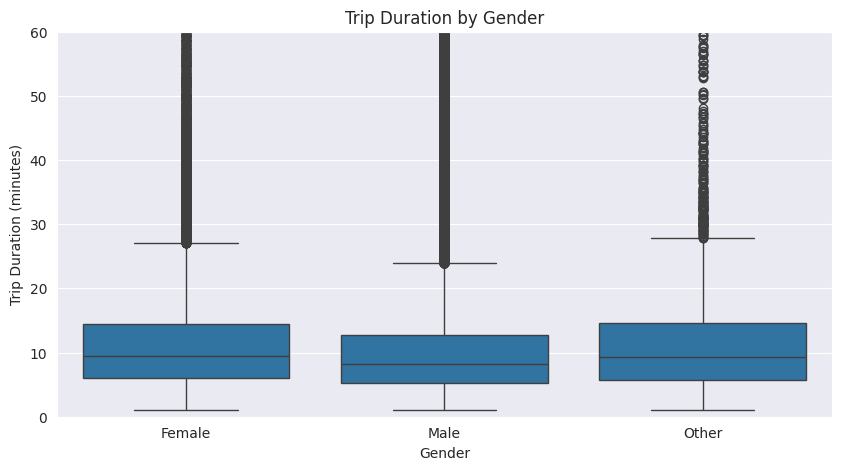

In [12]:
# Trip Duration by Gender (Boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x='member_gender', y='trip_duration_min', data=df)
plt.ylim(0,60)
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Trip duration distribution is similar for male and female riders.
The "Other" category has slightly more variability, but sample size is small.

#### Do subscribers and customers ride at the same times of the day?

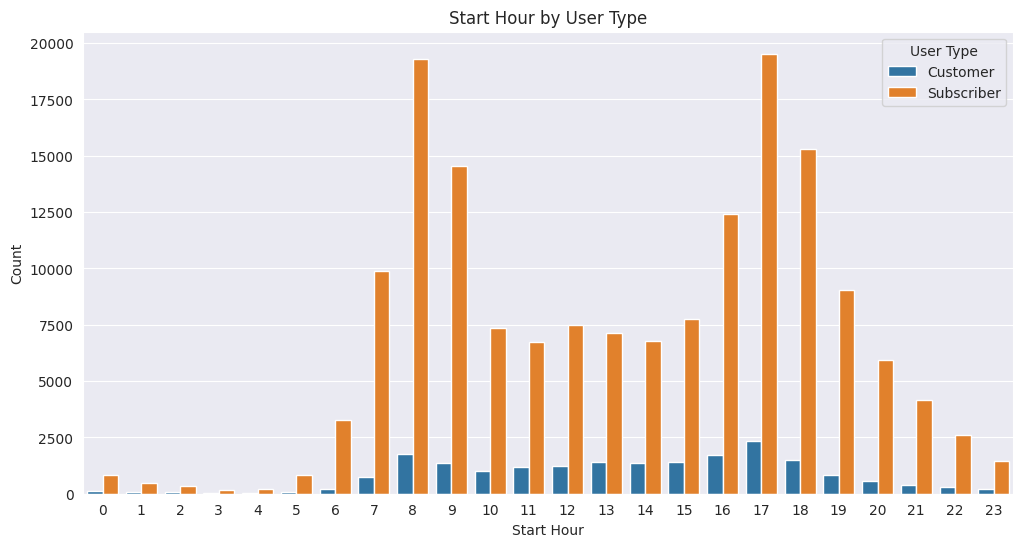

In [13]:
# Start Hour by User Type (Clustered Bar Chart)
plt.figure(figsize=(12,6))
sns.countplot(x='start_hour', hue='user_type', data=df)
plt.title('Start Hour by User Type')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.legend(title='User Type')
plt.show()

Subscribers have clear peaks during commute hours (8 AM, 5 PM).
Customers have a flatter distribution and ride more evenly throughout the day.

#### Are there correlations between numeric variables?

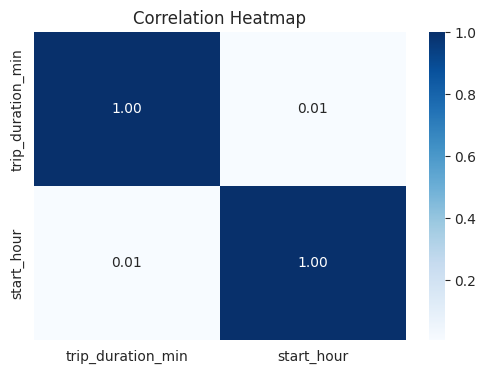

In [15]:
# Correlation Heatmap
numeric_df = df[['trip_duration_min', 'start_hour']]
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Trip duration and start hour have very weak correlation, meaning trip length does not depend much on time of day.

#### Is there a relationship between trip duration and start hour?

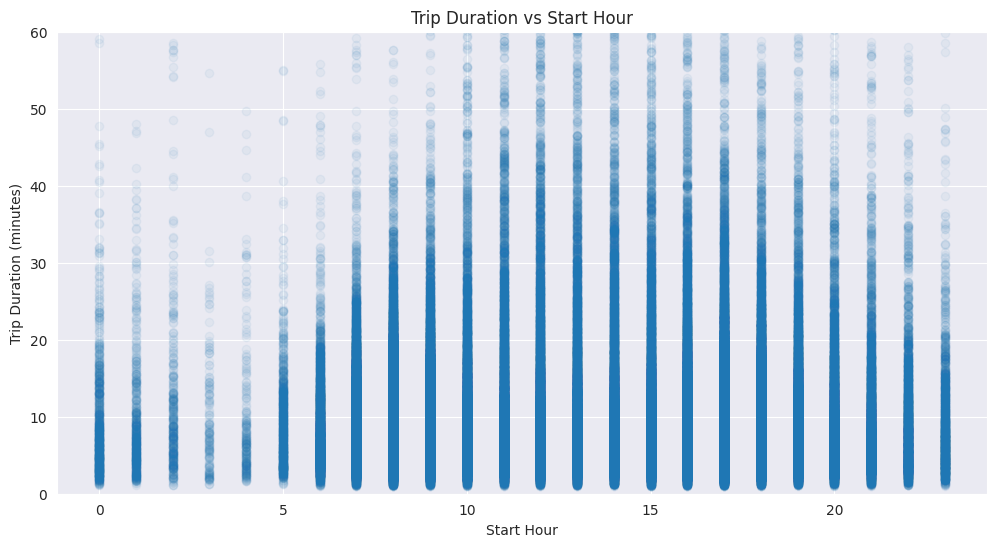

In [16]:
# Scatter Plot of Trip Duration vs Start Hour
plt.figure(figsize=(12,6))
plt.scatter(data=df, x='start_hour', y='trip_duration_min', alpha=0.05)
plt.ylim(0,60)
plt.title('Trip Duration vs Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Trip durations are spread across all hours, with no strong trend.
Outliers (very long trips) appear at all hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip duration (main feature) is slightly shorter for subscribers compared to customers. Trip duration distribution is very similar for male and female riders, with no strong gender-based difference. There is no clear pattern between trip duration and start hour – long trips appear at all hours.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. Subscribers tend to ride more during commute hours (8 AM and 5 PM), while customers have a flatter distribution and ride more evenly throughout the day. This indicates subscribers use the service mainly for work commutes, while customers might ride for leisure.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

In [17]:
# Create rider age (dataset year = 2019). Keep reasonable ages for analysis.
df['age'] = 2019 - df['member_birth_year']
df.loc[(df['age'] < 10) | (df['age'] > 90), 'age'] = np.nan

# Keep a bounded duration for clearer visuals (we'll still keep the raw data in df)
df_vis = df[df['trip_duration_min'] <= 60].copy()


#### Do user-type differences in duration persist across genders?

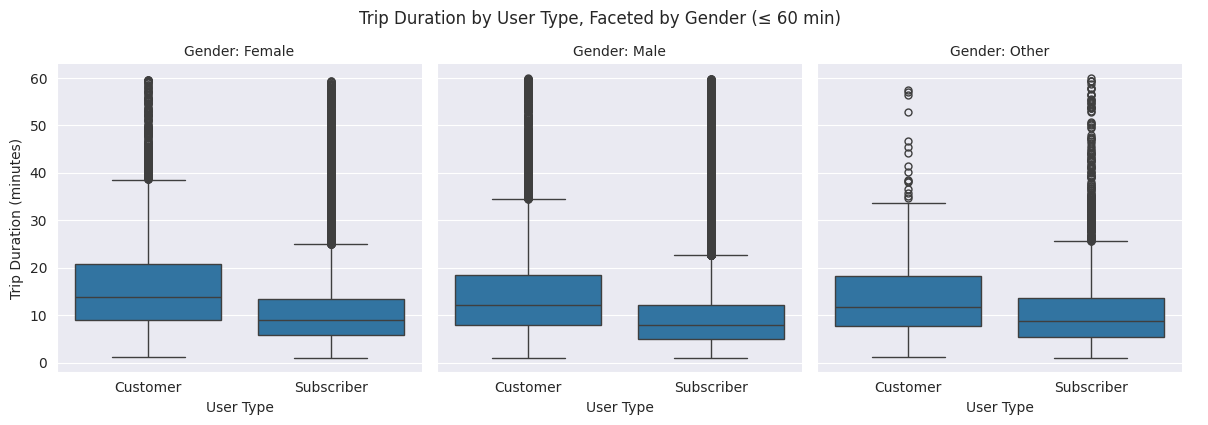

In [19]:
# Faceted boxplots: one facet per gender, comparing user types
g = sns.catplot(
    data=df_vis, kind='box',
    x='user_type', y='trip_duration_min',
    col='member_gender',
    height=4, aspect=1
)
g.set_axis_labels('User Type', 'Trip Duration (minutes)')
g.set_titles('Gender: {col_name}')
plt.suptitle('Trip Duration by User Type, Faceted by Gender (≤ 60 min)', y=1.05)
plt.show()


Across Female, Male, and Other facets, Subscribers consistently show lower medians/IQRs than Customers.

The “Other” facet is noisier (small sample size).

Overall patterns are stable across genders.

#### Does trip duration vary by time of day, and does this differ by user type or gender?

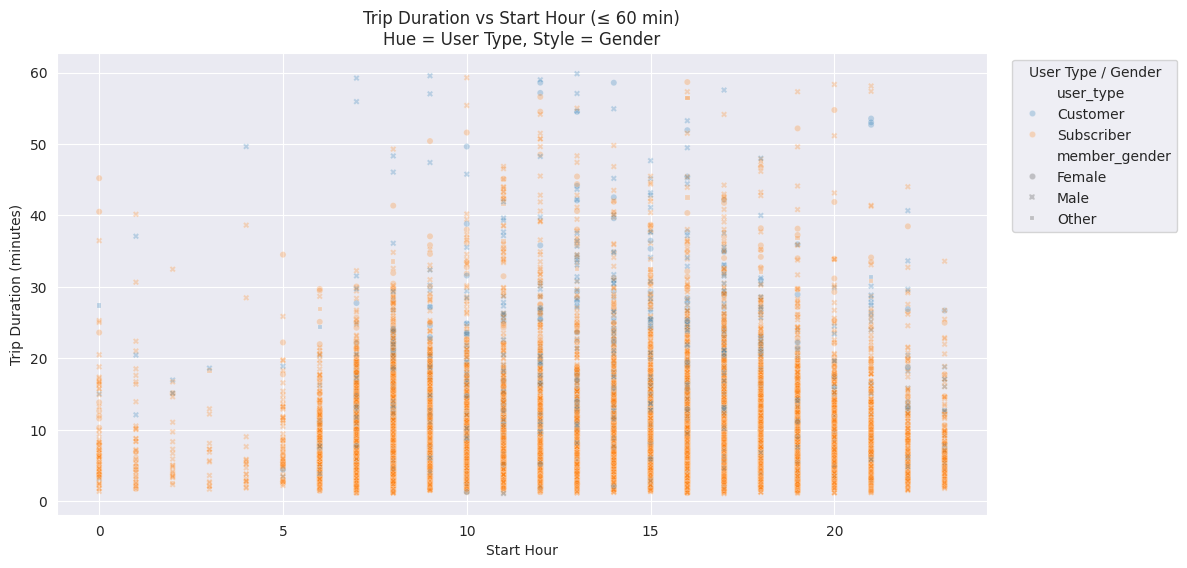

In [20]:
# Sample to reduce overplotting; keep enough points for pattern visibility
sample = df_vis.sample(n=15000, random_state=42) if len(df_vis) > 15000 else df_vis

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=sample,
    x='start_hour', y='trip_duration_min',
    hue='user_type', style='member_gender',
    alpha=0.25, s=20
)
plt.title('Trip Duration vs Start Hour (≤ 60 min)\nHue = User Type, Style = Gender')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='User Type / Gender', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


Durations are spread across all hours with no strong trend; long trips appear in every hour.

Coloring by user type shows Subscribers dominate counts in commute hours but durations themselves remain similar.

Marker style (gender) does not change the pattern in a meaningful way.

#### Are there joint relationships among duration, start hour, and age that differ by user type?

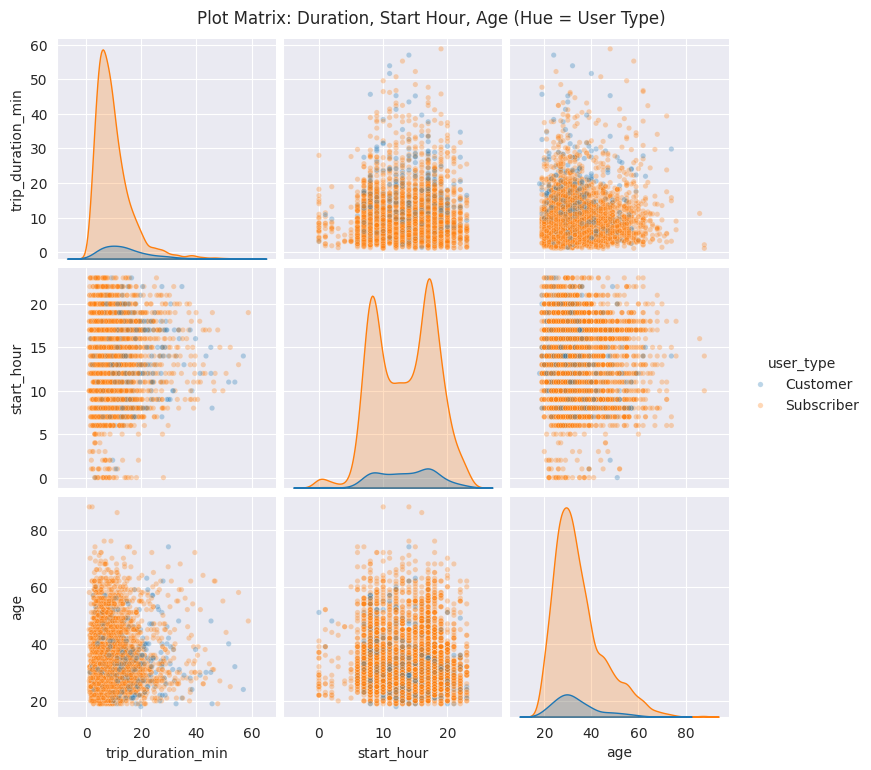

In [21]:
# Pairplot on numeric fields with minimal NaNs; sample to keep it light
num_cols = ['trip_duration_min', 'start_hour', 'age']
pp = df_vis[num_cols + ['user_type']].dropna()

pp_sample = pp.sample(n=4000, random_state=42) if len(pp) > 4000 else pp
sns.pairplot(
    data=pp_sample,
    vars=num_cols,
    hue='user_type',
    diag_kind='kde',
    plot_kws={'alpha': 0.3, 's': 15}
)
plt.suptitle('Plot Matrix: Duration, Start Hour, Age (Hue = User Type)', y=1.02)
plt.show()


Weak relationships overall: duration shows little association with start hour or age.

Any visible differences between Customers and Subscribers are mainly in frequency, not in the shapes of numeric relationships.

Age is fairly spread; no clear monotonic trend with duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip duration patterns stayed consistent across genders: subscribers always had slightly shorter trips than customers, regardless of gender.This consistency strengthens the observation that user type is a more important factor for trip duration than gender.Trip duration also did not vary much by start hour, showing that time of day does not strongly influence trip length.

### Were there any interesting or surprising interactions between features?

> The most interesting interaction was between user type and start hour: subscribers show strong peaks during commute hours (8 AM and 5 PM), while customers are more evenly distributed across the day. However, this difference is mostly in trip counts, not in trip duration — a somewhat surprising result since we might expect commuters to have shorter or more consistent trip times.

## Conclusions

### Summary of Findings:
Trip Duration: Most trips are short, usually less than 20 minutes. A few long trips exist but are rare outliers.

Start Hour: Clear peaks appear around 8 AM and 5 PM, indicating strong commuter usage.

User Type: Subscribers make up the majority of trips and show strong commute-hour patterns. Customers are more evenly distributed across the day.

Gender: Male riders form the largest group, followed by females. Trip duration is similar for males and females.

Bivariate Insights: Subscribers have slightly shorter trips than customers. Trip duration does not strongly depend on start hour.

Multivariate Insights: User type consistently affects trip duration across genders, and subscribers dominate ride counts during commute hours. Gender and time of day do not significantly change trip duration.

### Reflection:

During the exploration, I cleaned the data (converted dates, created trip duration and start hour columns, handled extreme values for clearer visuals).

I used histograms, boxplots, clustered bar charts, scatter plots, facet plots, and pairplots to examine relationships and confirm patterns.

The analysis provided clear insights about how trip duration and usage patterns vary by user type and time of day, helping to understand how the system is mainly used for commuting.